In 2015 a country that had seemingly eradicated measles saw a sudden increase in cases. Almost 1% of their population, most of them younger people, suddenly became sick. This was in Mongolia and 140 people died over the next two years as they worked to treat and prevent further infections. This epidemic is a story of vaccine failure (where the vaccine does not trigger an immune response) coupled with the risks of a highly mobile global population. The full details of the findings can be found [here](https://pmc.ncbi.nlm.nih.gov/articles/PMC11209263/), but as an amateur data scientist I wanted to use this story to highlight how we can learn by reviewing datasets.

The [Data Science Learning Community](dslc.io) releases a weekly dataset called TidyTuesday. In their measles dataset from June 24, 2025 I decided to look at which countries had the biggest change in cases relative to their population. Mongolia was the number one country on that list and led me down this interesting path.

In [8]:
import pandas as pd
from common import get_annual_measles_data_with_per_population_change
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [20]:
df = get_annual_measles_data_with_per_population_change()

# See the top 20 countries with the highest change ins measles cases per population
df[['country', 'year', 'absolute_change', 'absolute_change_per_population_percent']].sort_values(by='absolute_change_per_population_percent', ascending=False).head(20)

country  year  absolute_change  \
iso3 year                                                            
MNG  2017                          Mongolia  2017           -28694   
MDG  2020                        Madagascar  2020          -213207   
     2019                        Madagascar  2019           201239   
MNG  2015                          Mongolia  2015            20636   
FSM  2014  Micronesia (Federated States of)  2014              408   
     2015  Micronesia (Federated States of)  2015             -408   
KGZ  2016                        Kyrgyzstan  2016           -17779   
     2015                        Kyrgyzstan  2015            17460   
MNG  2016                          Mongolia  2016             8067   
GEO  2013                           Georgia  2013             7838   
SLB  2014                   Solomon Islands  2014              974   
SOM  2017                           Somalia  2017            23324   
SLB  2015                   Solomon Islands  2015             -974   
ROU  2024                           Romania  2024            27320   
AZE  2023                        Azerbaijan  2023            13727   
UKR  2020                           Ukraine  2020           -57121   
GEO  2014                           Georgia  2014            -4678   
UKR  2018                           Ukraine  2018            48436   
GNQ  2017                 Equatorial Guinea  2017            -1663   
KGZ  2023                        Kyrgyzstan  2023             7440   

           absolute_change_per_population_percent  
iso3 year                                          
MNG  2017                                0.924312  
MDG  2020                                0.736376  
     2019                                0.713119  
MNG  2015                                0.693291  
FSM  2014                                0.376398  
     2015                                 0.37529  
KGZ  2016                                0.291055  
     2015                                0.290909  
MNG  2016                                0.265291  
GEO  2013                                0.205769  
SLB  2014                                0.157884  
SOM  2017                                0.156362  
SLB  2015                                0.152327  
ROU  2024                                0.143675  
AZE  2023                                0.133037  
UKR  2020                                0.127845  
GEO  2014                                0.123335  
UKR  2018                                0.107138  
GNQ  2017                                0.106439  
KGZ  2023                                0.105181

Mongolia had the biggest change of any country (# of measles cases dropped by about 1% of the population). If we look back we see a big increase in 2015. Let's look at Mongolia from 2014-2017.

Text(0.5, 1.0, 'Measles Cases in Mongolia by Month (2014-2017)')

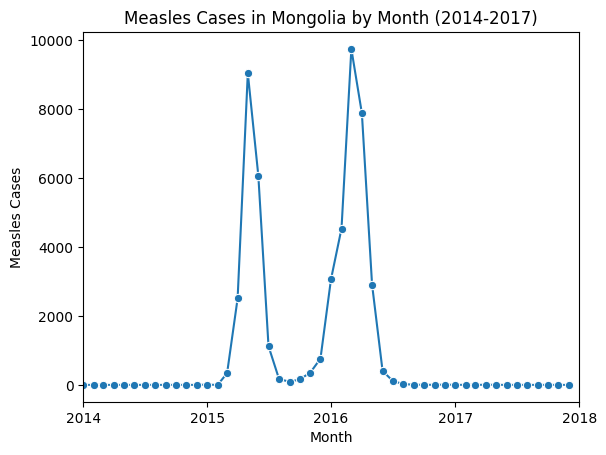

In [18]:

monthly_df = pd.read_csv('cases_month.csv')

# Get the monthly measles cases in Mongolia from 2014-2017
mongolia_outbreak_df = monthly_df[(monthly_df['iso3'] == 'MNG') & (monthly_df['year'].isin([2014, 2015, 2016, 2017]))]
# reset indext to month and date for better plotting
data_series = pd.to_datetime(mongolia_outbreak_df['year'].astype(str) + '-' + mongolia_outbreak_df['month'].astype(str))
mongolia_outbreak_df.insert(1, 'date', data_series)
mongolia_outbreak_df.set_index('date', inplace=True)

# plot the measles cases in Mongolia by month using seaborn
ax = sns.lineplot(data=mongolia_outbreak_df, x=mongolia_outbreak_df.index, y='measles_total', marker='o', legend=None)
# Add ticks only for each year
ax.xaxis.set_major_locator(mdates.YearLocator())
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(years_fmt)
datemin = np.datetime64(mongolia_outbreak_df.index.array[0], 'Y')
datemax = np.datetime64(mongolia_outbreak_df.index.array[-1], 'Y') + np.timedelta64(1, 'Y')

ax.set_xlim(datemin, datemax)
plt.xlabel('Month')
plt.ylabel('Measles Cases')
plt.title('Measles Cases in Mongolia by Month (2014-2017)')

So what happened? It turns out this was the first known case where "breakthrough infections" were a major contributor to the epidemic. I'm not educated enough to fully understand the cited paper below, but it seems there is good reason to believe that many people who became sick with the measles had been previously vaccinated. It is unclear from the paper what exactly contributed to the failure of the vaccines though there are a high number of people who do not have an immune response to the MMR vaccine. Therefore herd immunity protects those people until measles is brought into the country from another location. One important conclusion of the study is the importance in improving vaccinations worldwide.

Hagan JE, Crooke SN, Gunregjav N, Sowers SB, Mercader S, Hickman CJ, Mulders MN, Pastore R, Takashima Y, Durrheim DN, Goodson JL, Rota PA. Breakthrough Measles among Vaccinated Adults Born during the Post-Soviet Transition Period in Mongolia. Vaccines (Basel). 2024 Jun 20;12(6):695. doi: 10.3390/vaccines12060695. PMID: 38932425; PMCID: PMC11209263.